Se ha utilizado un cuadernillo para google colab, el cual utiliza lenguaje phyton y recursos computacionales en la nube. por las demandas del proyecto se contrato un servisio de paga que amplia las capacidades de procesamiento.

se instala el framework ultralytics para disponer y acceder a la funcionalidad del modelo preentrenado yolo8, en sus capacidades de segmentacion semantica

In [ ]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


Se va ha descargar el modelo preentrenado yolov8m-seg.pt

In [ ]:
# !yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/bus.jpg'

integramos nuestro google drive a este computador para acceder a informacion almacenada en el mismo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


instalamos librerias roboflow, que nos permitiran acceder a nuestro dataset (imagenes,marcaciones en formato yolo8)

In [ ]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="AmvwAaAnxUgw9B1Q6s4N")
#project = rf.workspace("jhenny-miranda").project("quirpinchaca")
#dataset = project.version(29).download("yolov8")


Importamos el objeto yolo dr la libreria ultralytics para utilizar el modelo para el entrenamiento con datos especificos (residuos solidos en las orillas del rio), porque el modelo no reconoce este tipo de objetos en estas circunstancias.
importamos las clase display e Image de la libreria de IPhyton.display para visualizar las fotografias cuando asi se requieran

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

creamos object model de la clase YOLO que utiliza un modelo preentrenado yolov8m-seg.pt

In [ ]:
# model = YOLO(f'/content/yolov8n-seg.pt')
# model = YOLO(f'/content/drive/MyDrive/JMB/checkpoints/best_13102023_l.pt')

# model = YOLO(f'/content/drive/MyDrive/JMB/dataset/runs/segment/train/segment/train/weights/epoch4.pt')

# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
# %cd /content/drive/MyDrive/JMB/dataset

In [ ]:
# !ls

In [ ]:
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train'})

In [ ]:
# !yolo task=detect mode=train model=yolov8n-seg.pt data= /content/dataset-29/data.yaml epochs=2 imgsz=640 plots=True save_period=1
!yolo task=detect mode=train model=yolov8m-seg.pt data= /content/drive/MyDrive/Yolo/Platos.v2i.yolov8/data.yaml epochs=45 imgsz=640 plots=True save_period=1
#!yolo task=detect mode=train resume model=/content/drive/MyDrive/JMB/checkpoints/last_25102023_0251_l.pt data= /content/drive/MyDrive/JMB/dataset/data.yaml epochs=40 imgsz=640 plots=True save_period=1

100% 52.4M/52.4M [00:00<00:00, 256MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/data.yaml, epochs=45, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [ ]:
!ls /content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train

segment


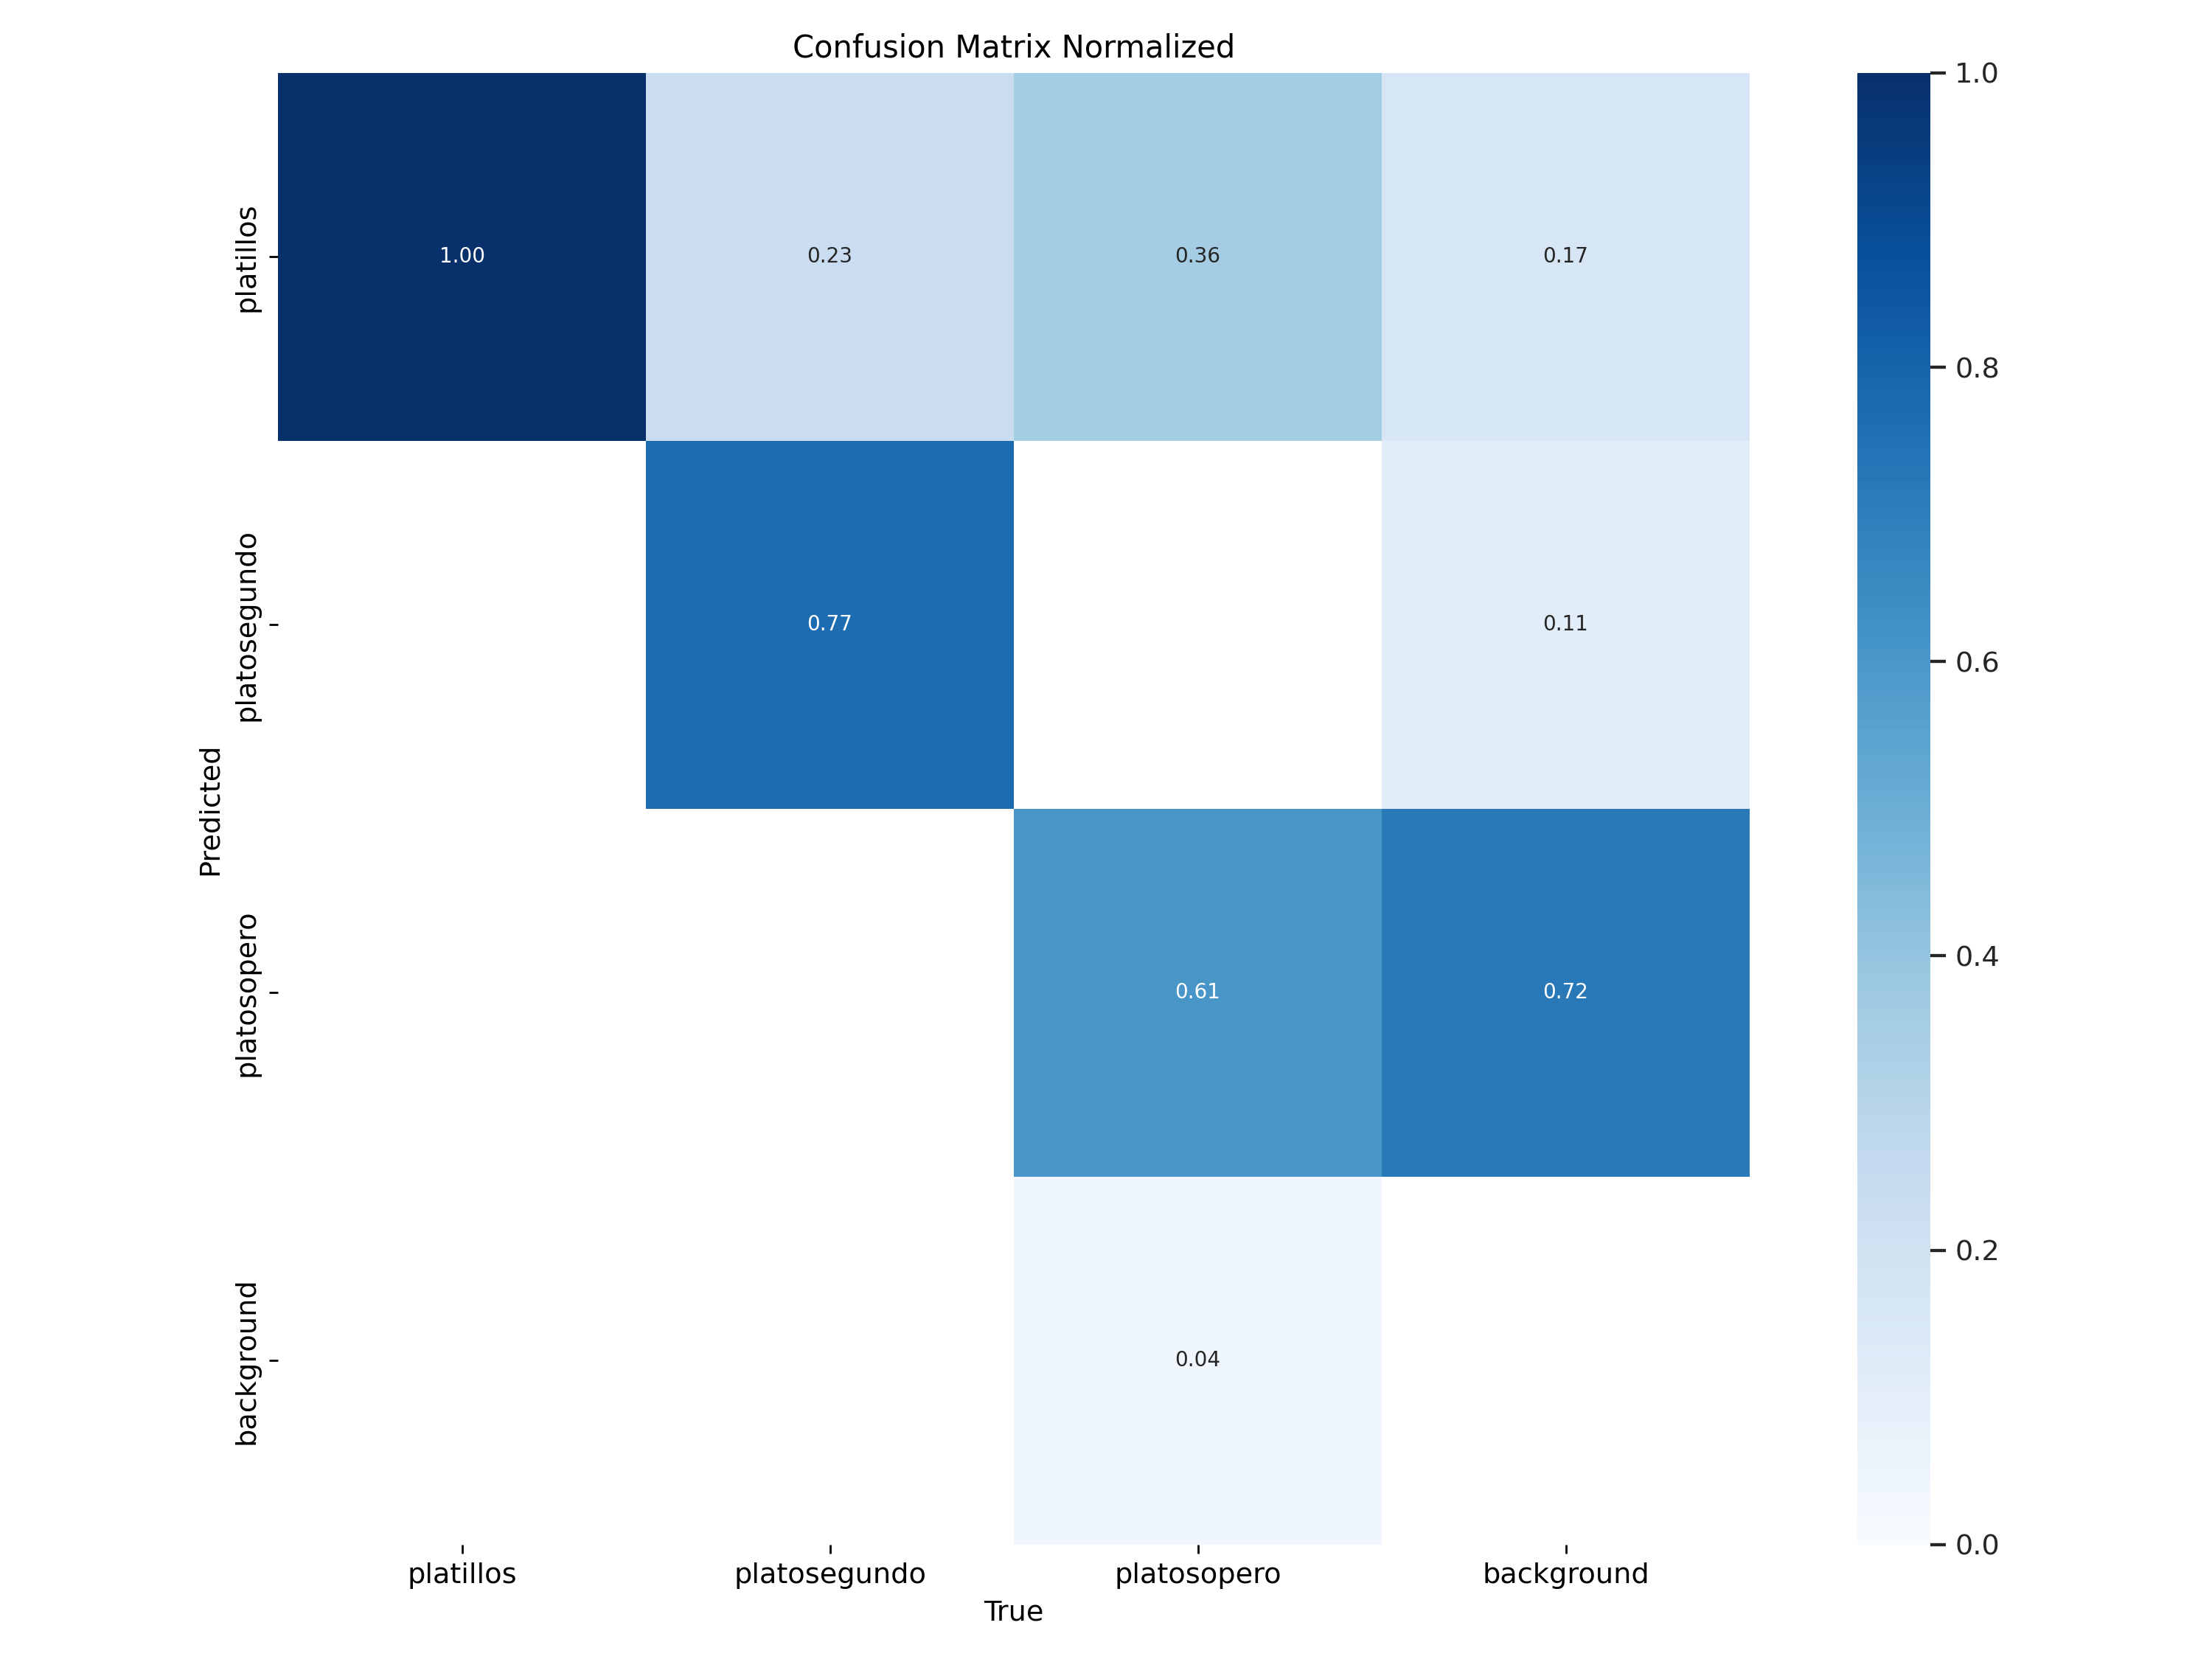

In [ ]:
#/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3/confusion_matrix_normalized.png
Image(filename='/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3/confusion_matrix_normalized.png', width=800)

In [ ]:
!ls /content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3

args.yaml					     labels.jpg        train_batch2.jpg
BoxF1_curve.png					     MaskF1_curve.png  train_batch3050.jpg
BoxP_curve.png					     MaskP_curve.png   train_batch3051.jpg
BoxPR_curve.png					     MaskPR_curve.png  train_batch3052.jpg
BoxR_curve.png					     MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv       val_batch0_pred.jpg
confusion_matrix.png				     results.png       val_batch1_labels.jpg
events.out.tfevents.1699515041.339698d47bdc.20942.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg  weights


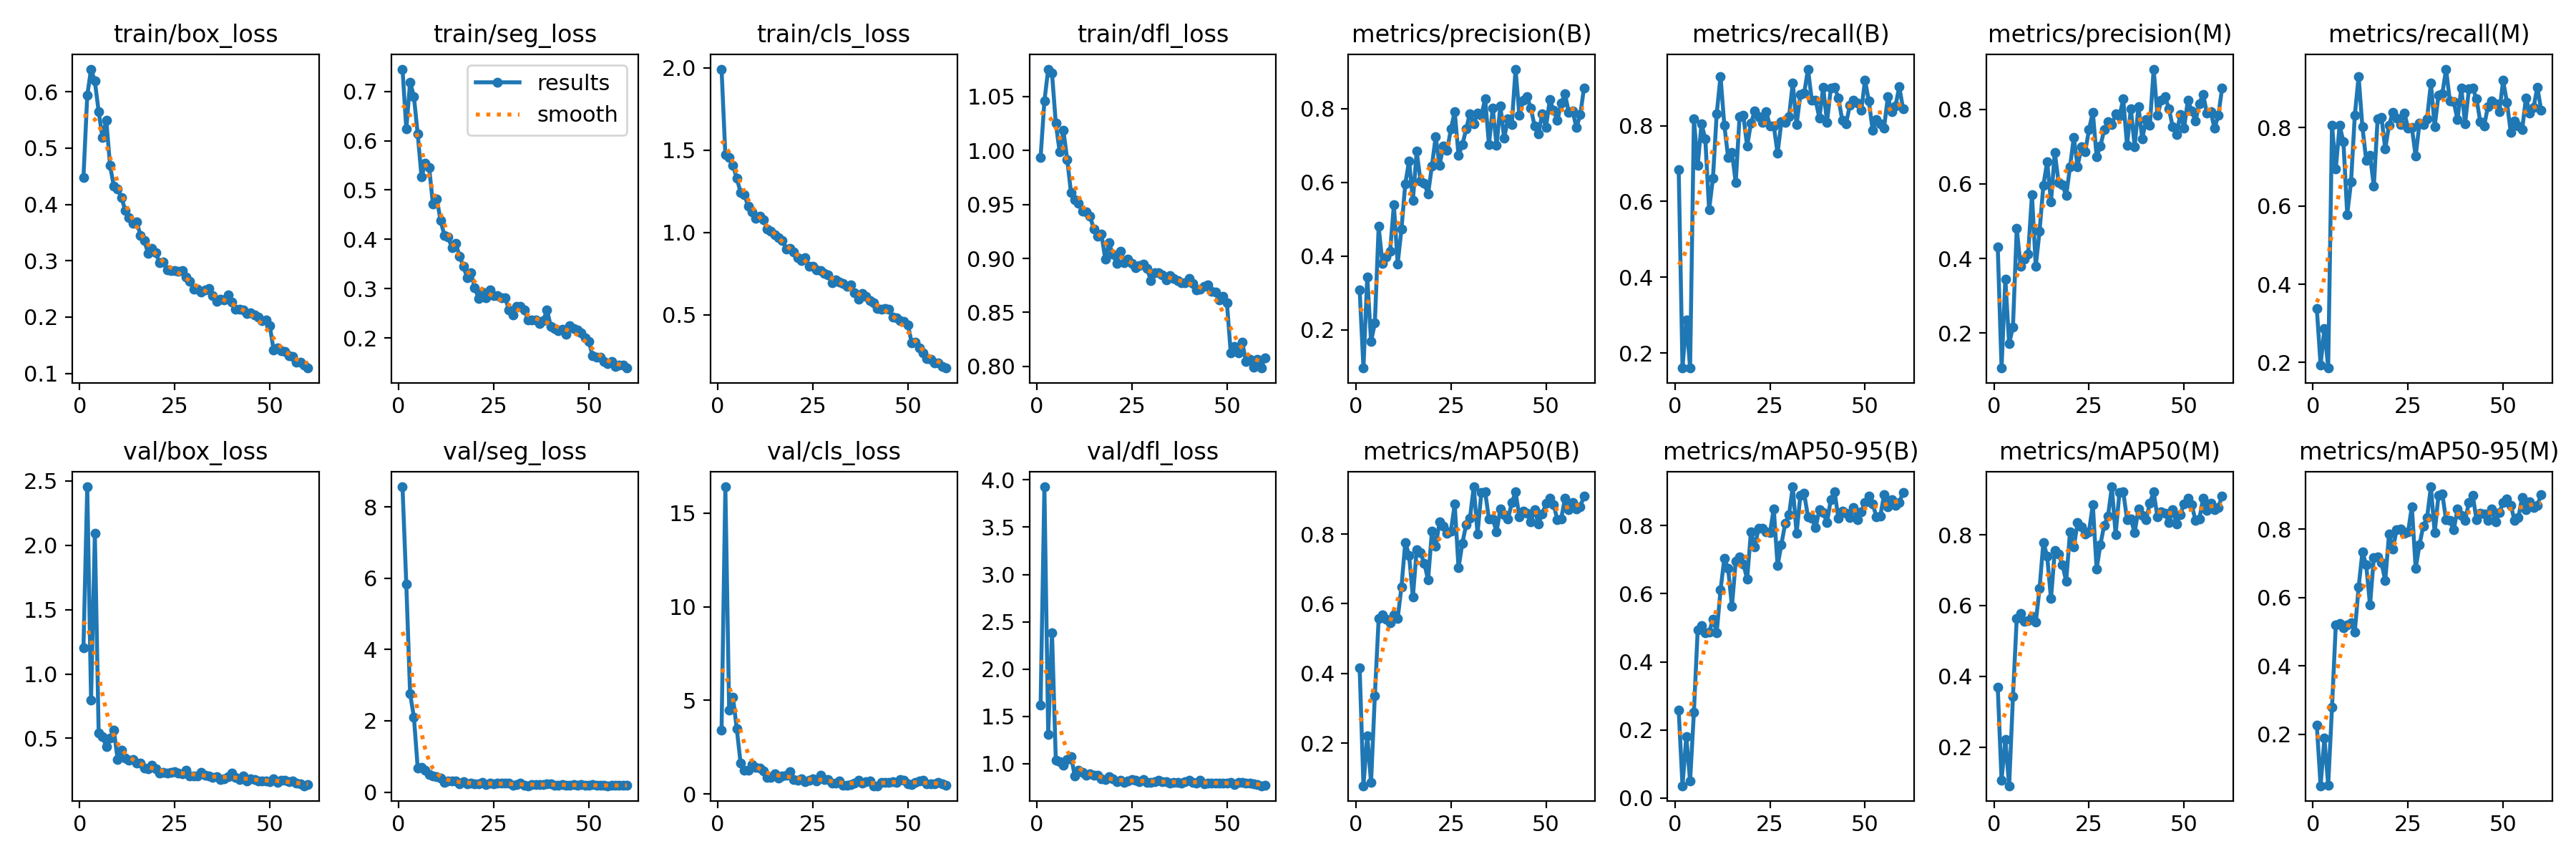

In [ ]:
Image(filename='/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3/results.png', width=800)

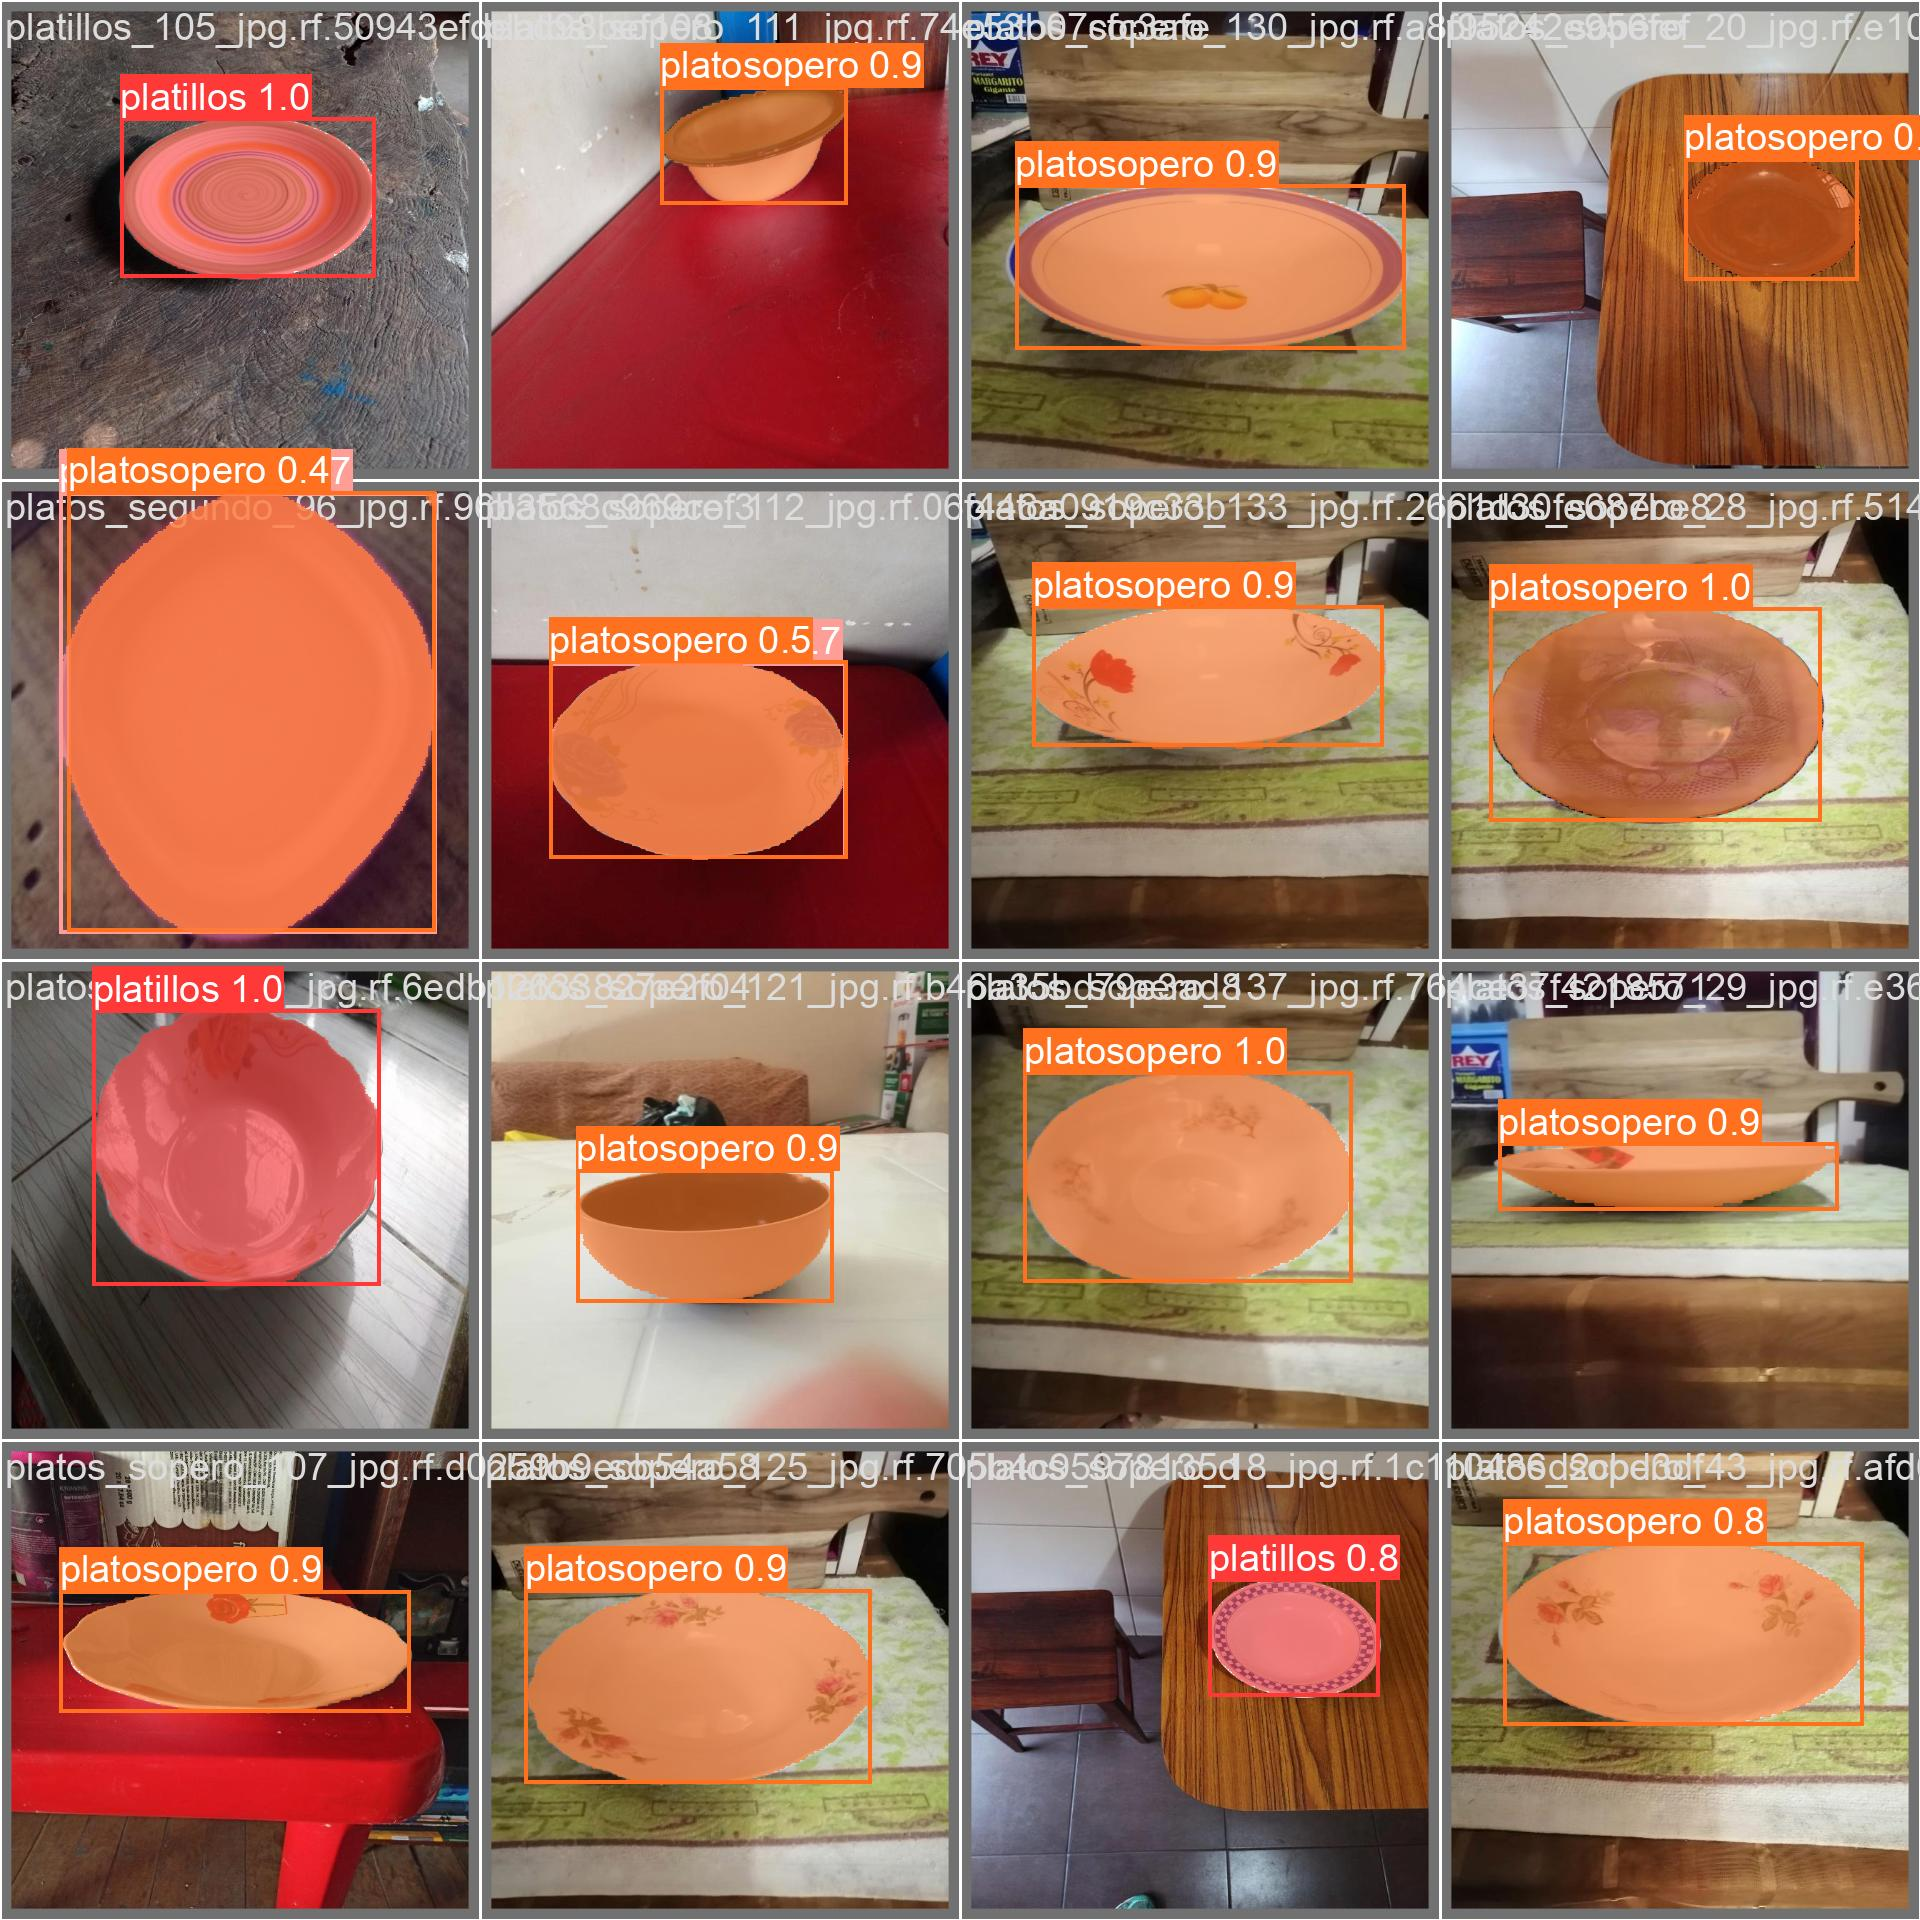

In [ ]:
Image(filename='/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3/val_batch0_pred.jpg', width=1000)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/JMB/dataset/runs/segment/train/segment/train/weights/best.pt data=/content/drive/MyDrive/JMB/dataset/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 419, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 94, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 146, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

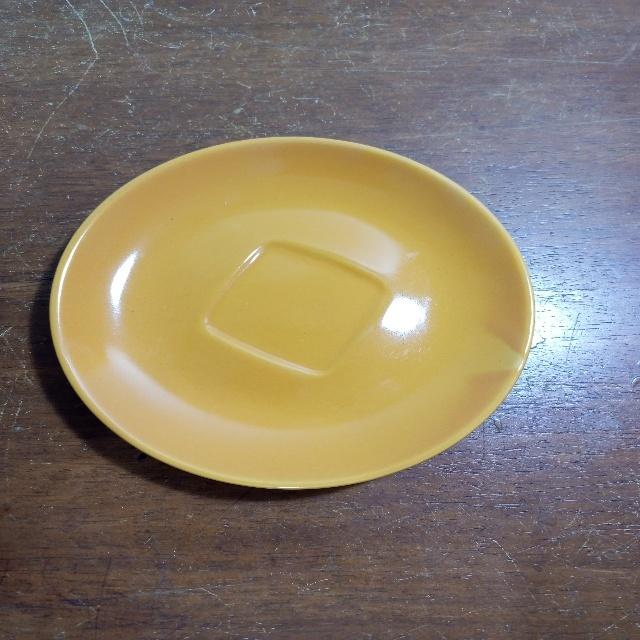

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
#/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/test/images/platillos_122_jpg.rf.73a44786a4667e155174b0ee87a50d2f.jpg
img_name='platillos_122_jpg.rf.73a44786a4667e155174b0ee87a50d2f'
img =cv2.imread(f"/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/test/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/test/images/{img_name}.jpg", width=600)

In [ ]:
model= YOLO("/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 640x640 1 platillos, 53.0ms
Speed: 3.2ms preprocess, 53.0ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 640)


True

In [ ]:
%cd /content/drive/MyDrive/Yolo/Platos.v2i.yolov8
!ls

/content/drive/.shortcut-targets-by-id/11SC0iUApX-g1jKEpGJYcuWLUG4i9d3lo/Yolo/Platos.v2i.yolov8
 data.yaml						     runs   'yolov8m-seg (1).pt'
 platillos_122_jpg.rf.73a44786a4667e155174b0ee87a50d2f.jpg   test    yolov8m-seg.pt
 README.dataset.txt					     train  'yolov8n (1).pt'
 README.roboflow.txt					     valid   yolov8n.pt


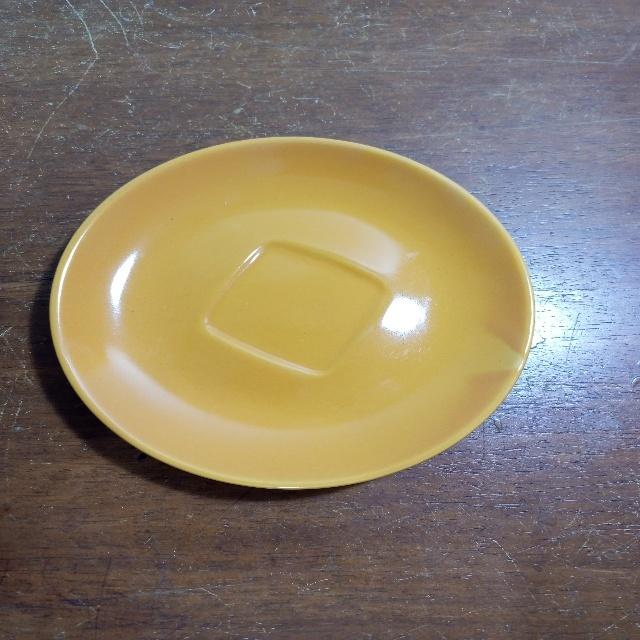

In [ ]:
Image(filename=f"/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/test/images/{img_name}.jpg", width=640)